## Lab 10: SVD and Image Compression

### Problem 1:

In [7]:
import numpy as np
from cmath import sqrt
from scipy import linalg as la
from matplotlib import pyplot as plt

In [8]:
def truncated_svd(A, k=None):
    AH = np.conj(A).T
    evals, evecs = la.eig(AH @ A)
    sort_order = np.argsort(evals)
    evals = evals[sort_order]
    evecs = evecs[sort_order]

    svals = np.sqrt(evals)
    
    if k != None:
        svals = svals[:k]
    V = evecs[:,:k]
    U = (A @ V) / svals
    
    return U, svals, V
    

In [9]:
# testing
A = np.random.random((5, 4))
U, svals, V = truncated_svd(A)

sigma = np.diag(svals)
VH = np.conj(V).T

np.allclose(A, (U@sigma@VH))

True

### Problem 2:

In [10]:
def vis_svd():
    domain = np.linspace(0, 2*np.pi, 100)
    A = np.array([[3,1],[1,3]])
    U, svals, V = truncated_svd(A)
    sigma = np.diag(svals)
    VH = np.conj(V).T
            
    x = np.cos(domain)
    y = np.sin(domain)
    S = np.array((x,y))
    
    e1 = np.array([0,1])
    e2 = np.array([1,0])
    
    plt.subplot(221)
    plt.plot((S)[0], (S)[1], color='blue', lw=1)
    plt.plot([0,e1[0]], [0,e1[1]], color='green')
    plt.plot([0,e2[0]], [0,e2[1]], color='green')
    plt.title("Unit Circle, S")
    plt.axis("equal")
    
    plt.subplot(222)
    plt.plot((V@S)[0], (V@S)[1], color='blue', lw=1)
    plt.plot([0,(V@e1)[0]], [0, (V@e1)[1]], color='green')
    plt.plot([0,(V@e2)[0]], [0, (V@e2)[1]], color='green')
    plt.title("V^H*S")
    plt.axis("equal")
 
    plt.subplot(223)
    plt.plot((sigma@V@S)[0], (sigma@V@S)[1], color='blue', lw=1)
    plt.plot([0,(sigma@V@e1)[0]], [0, (sigma@V@e1)[1]], color='green')
    plt.plot([0,(sigma@V@e2)[0]], [0, (sigma@V@e2)[1]], color='green')
    plt.title("Σ* V^H * S")
    plt.axis("equal")
    
    plt.subplot(224)
    plt.plot((U@sigma@V@S)[0], (U@sigma@V@S)[1], color='blue', lw=1)
    plt.plot([0,(U@sigma@V@e1)[0]], [0, (U@sigma@V@e1)[1]], color='green')
    plt.plot([0,(U@sigma@V@e2)[0]], [0, (U@sigma@V@e2)[1]], color='green')
    plt.title("U * Σ * V^H * S")
    plt.axis("equal")
    
    plt.tight_layout()
    plt.show()

    

//anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


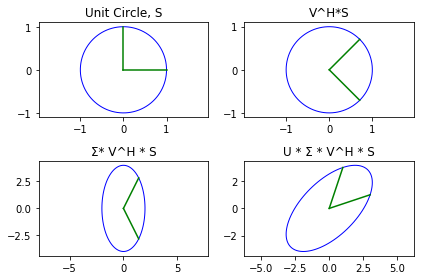

In [11]:
vis_svd()

### Problem 3:

In [12]:
def svd_approx(A, k):
    U, s, Vh = la.svd(A, full_matrices=False)
    Ar = np.zeros((len(U), len(Vh)))
    for i in range(k):
        Ar += s[i] * np.outer(U.T[i], Vh[i])
    return Ar

In [13]:
A = np.random.random((5, 4))
svd_approx(A, 1)

array([[ 0.64802001,  0.56226326,  0.36290223,  0.71394694],
       [ 0.52989712,  0.45977235,  0.2967514 ,  0.58380671],
       [ 0.61199587,  0.53100642,  0.34272809,  0.67425785],
       [ 0.21203566,  0.18397558,  0.11874357,  0.23360731],
       [ 0.44228777,  0.38375692,  0.24768867,  0.48728434]])

### Problem 4:

In [14]:
def lowest_rank_approx(A, e):
    U, s, Vh = la.svd(A, full_matrices=False)
    r = np.size(s)
    for i in range(r, 0, -1):
        S = np.diag(s[:i])
        Ahat_prev = Ahat
        Ahat = U[:,:i].dot(S).dot(Vh[:i,:])
        if la.norm(A, Ahat) >= e:
            return Ahat_prev
        

### Problem 5:

In [15]:
def compress_img(filename, k):
    X = plt.imread(filename)
    red = X[:,:,0]
    green = X[:,:,1]
    blue = X[:,:,2]
    
    red = np.divide(red, 255)
    green = np.divide(green, 255)
    blue = np.divide(blue, 255)
    
    r_approx = svd_approx(red, k)
    g_approx = svd_approx(green, k)
    b_approx = svd_approx(blue, k)
    
    r_approx[r_approx > 1] = 1
    r_approx[r_approx < 0] = 0
    
    g_approx[g_approx > 1] = 1
    g_approx[g_approx < 0] = 0
    
    b_approx[b_approx > 1] = 1
    b_approx[b_approx < 0] = 0
    
    result = np.dstack((r_approx, g_approx, b_approx))
    plt.imshow(result)
    plt.show()

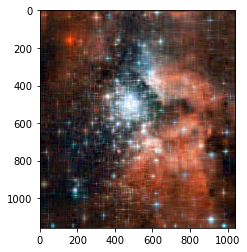

In [19]:
compress_img('hubble.jpg', 20)